# Task 1: Data preparation and customer analytics

In [2]:
import pandas as pd

# pd.set_option("display.notebook_repr_html", False)  # disable "rich" output

# Read the CSV files
transactions = pd.read_excel('QVI_transaction_data.xlsx')
customer = pd.read_csv('QVI_purchase_behaviour.csv')

## Exploratory Data Analysis (Transaction dataset)


### Examine the first 5 rows

In [2]:
pd.set_option("display.notebook_repr_html", True)  # disable "rich" output

# Look at the first 5 rows
transactions.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Checking column formats

In [3]:
# Check the data types of each column in the transactions DataFrame
print("Column data types:")
print(transactions.dtypes)

Column data types:
DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


### Convert DATE to date format

In [4]:
# Convert Excel serial date to datetime format
transactions['DATE'] = pd.to_datetime(transactions['DATE'], origin='1899-12-30', unit='D')

# Confirm the conversion
print("Converted DATE column:")
print(transactions['DATE'].head())
print(transactions.dtypes)

Converted DATE column:
0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]
DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object


### Summary of PROD_NAME

In [5]:
# Basic summary: number of unique product names
print(f"Number of unique products: {transactions['PROD_NAME'].nunique()}")

# Most and least common products
print("\nTop 10 most common products:")
print(transactions['PROD_NAME'].value_counts().head(10))

print("\nBottom 10 least common products:")
print(transactions['PROD_NAME'].value_counts().tail(10))

Number of unique products: 114

Top 10 most common products:
PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Name: count, dtype: int64

Bottom 10 least common products:
PROD_NAME
Thins Chips         Originl saltd 175g      1441
Smiths Chip Thinly  CutSalt/Vinegr175g      1440
Smiths Crinkle Cut  French OnionDip 150g    1438
Red Rock Deli Chikn&Garlic Aioli 150g       1434
Sunbites Whlegrn    Crisps Frch/Onin 90g    1432
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden

### Text analysis to summarise words in product name

In [6]:
from collections import Counter
import re

# Combine all product names into one large string and tokenize
all_words = ' '.join(transactions['PROD_NAME'].dropna()).lower()
words = re.findall(r'\b\w+\b', all_words)  # Extract words using regex

# Count word frequencies
word_freq = Counter(words)

# Display the top 20 most common words
print("Top 20 most common words in product names:")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

Top 20 most common words in product names:
175g: 60561
chips: 49770
150g: 43131
kettle: 41288
smiths: 28860
salt: 27976
cheese: 27890
pringles: 25102
134g: 25102
doritos: 24962
crinkle: 23960
110g: 22387
corn: 22063
original: 21560
cut: 20754
chip: 18645
170g: 18502
salsa: 18094
cream: 15465
chicken: 15407


### Remove words with special digits and characters. Sort distinct words by frequency.

In [7]:
# Combine all product names into a single lowercase string
all_words = ' '.join(transactions['PROD_NAME'].dropna()).lower()

# Use regex to extract only words that:
# - contain letters only (no digits or special characters)
words = re.findall(r'\b[a-z]+\b', all_words)

# Count frequency
word_freq = Counter(words)

# Display top 20 cleaned words
print("Top 20 product words (letters only):")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

Top 20 product words (letters only):
chips: 49770
kettle: 41288
smiths: 28860
salt: 27976
cheese: 27890
pringles: 25102
doritos: 24962
crinkle: 23960
corn: 22063
original: 21560
cut: 20754
chip: 18645
salsa: 18094
cream: 15465
chicken: 15407
chilli: 15390
sea: 14145
thins: 14075
sour: 13882
crisps: 12607


### Removing Salsa items

In [15]:
# Remove all products with "salsa" in the product name (case-insensitive)
transactions_cleaned = transactions[~transactions['PROD_NAME'].str.lower().str.contains('salsa')]

# Confirm how many rows were removed
print(f"Original rows: {len(transactions)}")
print(f"After removing 'salsa' products: {len(transactions_cleaned)}")

Original rows: 246742
After removing 'salsa' products: 246742


### Summary statistics of each feature

In [16]:
# Summary statistics for numeric columns
print("Summary Statistics:")
print(transactions.describe())

# Check for null values in each column
print("\nNull Value Check:")
print(transactions.isnull().sum())

Summary Statistics:
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000       5.800000  
50%  

### Investigating outliers

In [11]:
# Investigate transactions where 200 packets were purchased
unusual_transactions = transactions[transactions['PROD_QTY'] == 200]

print(f"Number of transactions with 200 packets: {len(unusual_transactions)}")
print(unusual_transactions)

Number of transactions with 200 packets: 2
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [12]:
# Filter all transactions made by LYLTY_CARD_NBR 226000
customer_226000 = transactions[transactions['LYLTY_CARD_NBR'] == 226000]

# Show how many transactions and the details
print(f"Total transactions by customer 226000: {len(customer_226000)}")
print(customer_226000)

Total transactions by customer 226000: 2
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [17]:
# Remove all transactions from LYLTY_CARD_NBR 226000
transactions_cleaned = transactions[transactions['LYLTY_CARD_NBR'] != 226000]

# Confirm change
print(f"Original rows: {len(transactions)}")
print(f"After removing customer 226000: {len(transactions_cleaned)}")

Original rows: 246742
After removing customer 226000: 246740


### Re-examine transaction data 

In [18]:
# Re-check summary statistics
print(" Summary Statistics After Cleaning:")
print(transactions_cleaned.describe())

# Unique values of product quantity
print("\n Unique Values in PROD_QTY After Cleaning:")
print(sorted(transactions_cleaned['PROD_QTY'].unique()))

# Max product quantity and total sales
max_qty = transactions_cleaned['PROD_QTY'].max()
max_sales = transactions_cleaned['TOT_SALES'].max()

print(f"\n Highest product quantity after cleaning: {max_qty}")
print(f" Highest total sales after cleaning: ${max_sales}")

# Final check for nulls
print("\n Null Value Check After Cleaning:")
print(transactions_cleaned.isnull().sum())

 Summary Statistics After Cleaning:
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246740  246740.000000    2.467400e+05   
mean   2018-12-30 01:18:58.448569344     135.050361    1.355303e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030832e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.786971    8.071520e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467400e+05  246740.000000  246740.000000  246740.000000  
mean   1.351304e+05      56.352213       1.906456       7.316113  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756875e+04      26.000000       2.000000       

### Summary of transaction count by date

In [19]:
# Number of unique dates in the cleaned transactions
unique_dates = transactions_cleaned['DATE'].nunique()
print(f" Number of unique transaction dates: {unique_dates}")


 Number of unique transaction dates: 364


Given there are 364 rows, this suggests a missing date. 

Missing date(s):
          DATE  transaction_count
177 2018-12-25                NaN


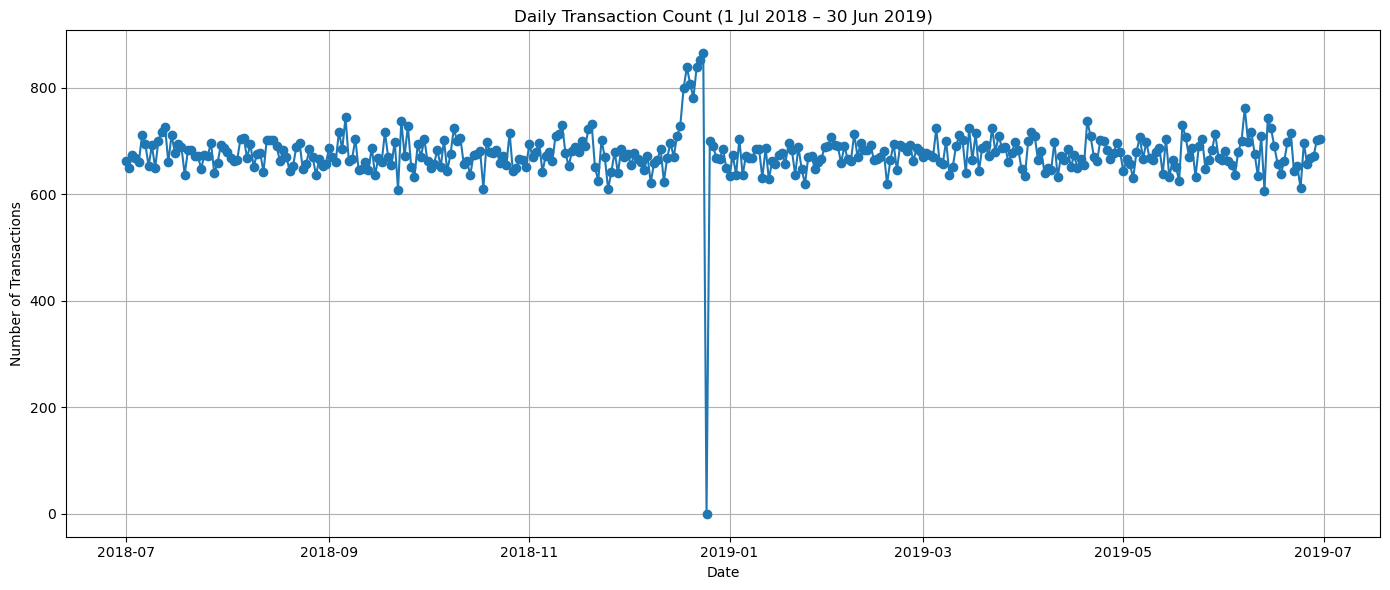

In [21]:
import matplotlib.pyplot as plt

# Step 1: Create full date range from 1 Jul 2018 to 30 Jun 2019
full_date_range = pd.DataFrame({
    'DATE': pd.date_range(start='2018-07-01', end='2019-06-30')
})

# Step 2: Group actual transactions by date
txn_count_by_date = transactions_cleaned.groupby('DATE').size().reset_index(name='transaction_count')

# Step 3: Merge actual transaction counts with full date range
merged_txn = pd.merge(full_date_range, txn_count_by_date, on='DATE', how='left')

# Step 4: Find the missing date (NaN in transaction_count)
missing_date = merged_txn[merged_txn['transaction_count'].isna()]
print("Missing date(s):")
print(missing_date)

# Step 5: Fill NaNs with 0 for plotting
merged_txn['transaction_count'].fillna(0, inplace=True)

# Step 6: Plot the number of transactions over time
plt.figure(figsize=(14, 6))
plt.plot(merged_txn['DATE'], merged_txn['transaction_count'], marker='o', linestyle='-')
plt.title('Daily Transaction Count (1 Jul 2018 – 30 Jun 2019)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

We can see an increase in purchases in December and a dip in late December. We can look in on this more closely.

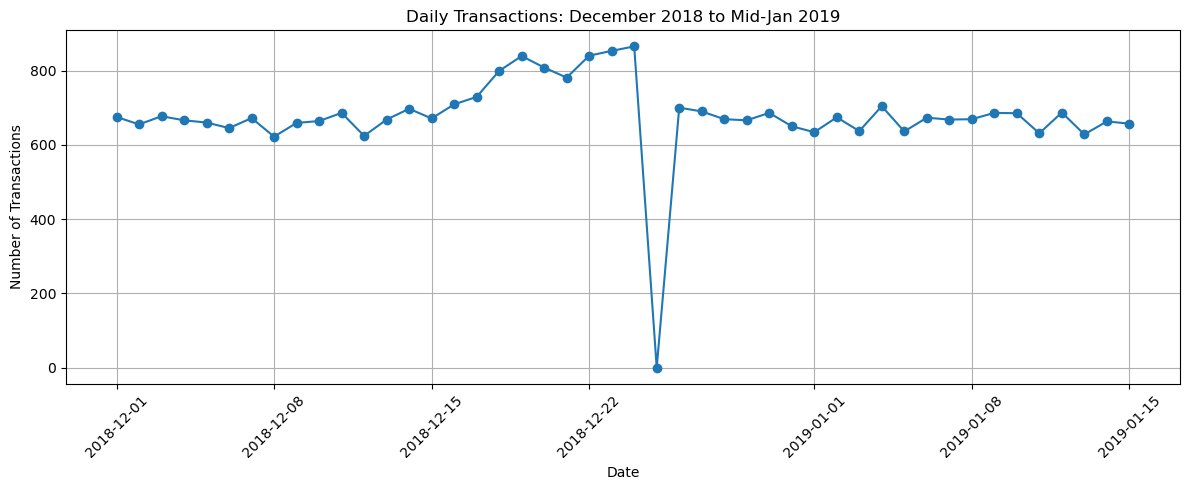

In [22]:
# Filter for relevant date range
zoom_range = merged_txn[(merged_txn['DATE'] >= '2018-12-01') & (merged_txn['DATE'] <= '2019-01-15')]

# Plot zoomed-in daily transaction count
plt.figure(figsize=(12, 5))
plt.plot(zoom_range['DATE'], zoom_range['transaction_count'], marker='o', linestyle='-')
plt.title('Daily Transactions: December 2018 to Mid-Jan 2019')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

It is observed that there is an increase in sales leading up to Christmas with zero sales on Christmas day itself. This is due to shops being closed on Christmas day.
We can be confident now that the data longer has outliers.

### Creating new features 

**Creating Packsize**

In [23]:
# Use pandas' .str.extract() with a regex to get digits before 'g' or 'G'
transactions_cleaned['PACK_SIZE'] = transactions_cleaned['PROD_NAME'].str.extract(r'(\d+)\s*[gG]').astype(float)

# Check outputs
pack_size_summary = transactions_cleaned.groupby('PACK_SIZE').size().reset_index(name='N').sort_values('PACK_SIZE')

print(pack_size_summary)

    PACK_SIZE      N
0        70.0   1507
1        90.0   3008
2       110.0  22387
3       125.0   1454
4       134.0  25102
5       135.0   3257
6       150.0  40203
7       160.0   2970
8       165.0  15297
9       170.0  19983
10      175.0  66390
11      180.0   1468
12      190.0   2995
13      200.0   4473
14      210.0   6272
15      220.0   1564
16      250.0   3169
17      270.0   6285
18      330.0  12540
19      380.0   6416


C:\Users\User\AppData\Local\Temp\ipykernel_7004\3032617692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_cleaned['PACK_SIZE'] = transactions_cleaned['PROD_NAME'].str.extract(r'(\d+)\s*[gG]').astype(float)


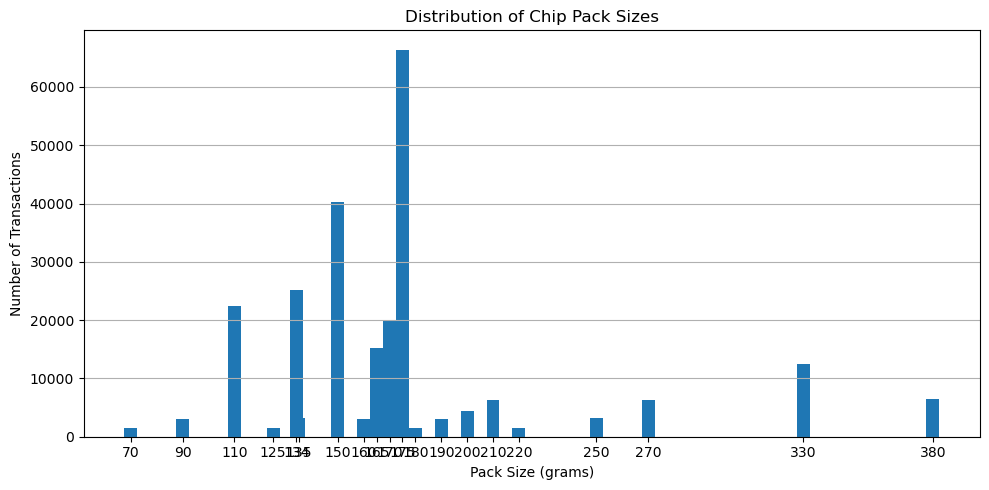

In [24]:
# Count occurrences of each pack size
pack_size_counts = transactions_cleaned['PACK_SIZE'].value_counts().sort_index()

# Plot as a bar chart (categorical histogram)
plt.figure(figsize=(10, 5))
plt.bar(pack_size_counts.index.astype(int), pack_size_counts.values, width=5)

plt.title('Distribution of Chip Pack Sizes')
plt.xlabel('Pack Size (grams)')
plt.ylabel('Number of Transactions')
plt.xticks(pack_size_counts.index.astype(int))  # Ensure ticks match actual sizes
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Creating Brands Feature**

In [31]:
# Make an explicit copy of the cleaned dataset
transactions_cleaned = transactions_cleaned.copy()

# Extract the first word of PROD_NAME as BRAND
transactions_cleaned['BRAND'] = transactions_cleaned['PROD_NAME'].str.split().str[0]

# Check result
print(transactions_cleaned[['PROD_NAME', 'BRAND']].head(10))

                                   PROD_NAME    BRAND
0     Natural Chip        Compny SeaSalt175g  Natural
1                   CCs Nacho Cheese    175g      CCs
2     Smiths Crinkle Cut  Chips Chicken 170g   Smiths
3     Smiths Chip Thinly  S/Cream&Onion 175g   Smiths
4   Kettle Tortilla ChpsHny&Jlpno Chili 150g   Kettle
6   Smiths Crinkle Chips Salt & Vinegar 330g   Smiths
7      Grain Waves         Sweet Chilli 210g    Grain
8    Doritos Corn Chip Mexican Jalapeno 150g  Doritos
9      Grain Waves Sour    Cream&Chives 210G    Grain
10  Smiths Crinkle Chips Salt & Vinegar 330g   Smiths


In [32]:
# Show all unique brand names
unique_brands = transactions_cleaned['BRAND'].unique()
print("Unique brand names:")
print(sorted(unique_brands))

Unique brand names:
['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito', 'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns', 'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith', 'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties', 'Tyrrells', 'WW', 'Woolworths']


In [35]:
# Define mapping for brand name corrections
brand_corrections = {
    'Red': 'RRD',
    'RRD': 'RRD',
    'Woolworths': 'WW',
    'WW': 'WW',
    'Natural': 'NCC',
    'NCC': 'NCC',
    'Dorito': 'Doritos',
    'Doritos': 'Doritos',
    'Grain': 'GrnWves',
    'GrnWves': 'GrnWves',
    'Infzns': 'Infuzions',
    'Infuzions': 'Infuzions',
    'Smith': 'Smiths',
    'Smiths': 'Smiths',
    'Snbts': 'Sunbites',
    'Sunbites': 'Sunbites'
}

# Standardize brand names using mapping
transactions_cleaned.loc[:, 'BRAND'] = transactions_cleaned['BRAND'].map(brand_corrections).fillna(transactions_cleaned['BRAND'])

# Check final list of unique brand names
print("Cleaned unique brand names:")
print(sorted(transactions_cleaned['BRAND'].unique()))



Cleaned unique brand names:
['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos', 'French', 'GrnWves', 'Infuzions', 'Kettle', 'NCC', 'Pringles', 'RRD', 'Smiths', 'Sunbites', 'Thins', 'Tostitos', 'Twisties', 'Tyrrells', 'WW']


In [37]:
transactions_cleaned.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210.0,GrnWves
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150.0,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210.0,GrnWves
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330.0,Smiths


## Exploratory Data Analysis (Customer dataset)


In [40]:
pd.set_option("display.notebook_repr_html", False)  # disable "rich" output
customer.head(10)


   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
5            1007   YOUNG SINGLES/COUPLES           Budget
6            1009            NEW FAMILIES          Premium
7            1010   YOUNG SINGLES/COUPLES       Mainstream
8            1011   OLDER SINGLES/COUPLES       Mainstream
9            1012          OLDER FAMILIES       Mainstream

In [45]:
# General info and structure
print("Basic info:")
print(customer.info())

# Number of rows and columns
print(f"\nShape of dataset: {customer.shape}")

# Check for missing values
print("\nNull values in customer data:")
print(customer.isnull().sum())

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Shape of dataset: (72637, 3)

Null values in customer data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [46]:
# Unique lifestages
print("\nLifestage distribution:")
print(customer['LIFESTAGE'].value_counts())

# Unique premium statuses
print("\nPremium customer distribution:")
print(customer['PREMIUM_CUSTOMER'].value_counts())

# Cross-tab: premium status vs. lifestage
print("\nCross-tab of LIFESTAGE vs PREMIUM_CUSTOMER:")
print(pd.crosstab(customer['LIFESTAGE'], customer['PREMIUM_CUSTOMER']))



Lifestage distribution:
LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

Premium customer distribution:
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

Cross-tab of LIFESTAGE vs PREMIUM_CUSTOMER:
PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    1504        3340     2431
NEW FAMILIES              1112         849      588
OLDER FAMILIES            4675        2831     2274
OLDER SINGLES/COUPLES     4929        4930     4750
RETIREES                  4454        6479     3872
YOUNG FAMILIES            4017        2728     2433
YOUNG SINGLES/COUPLES     3779        8088     2574


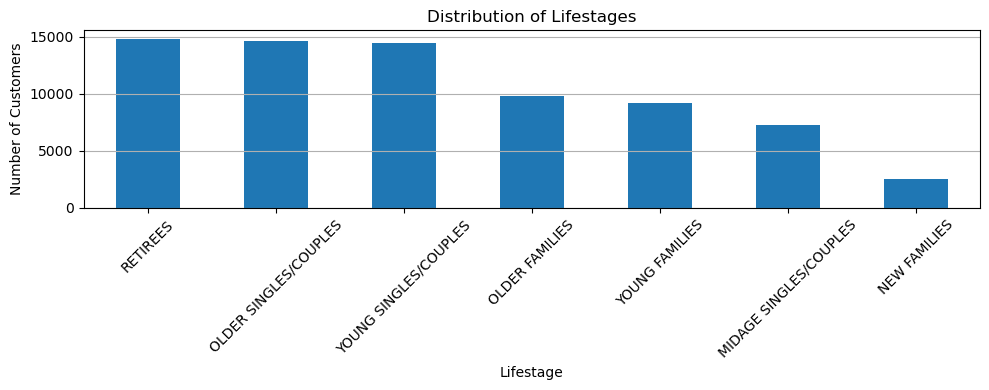

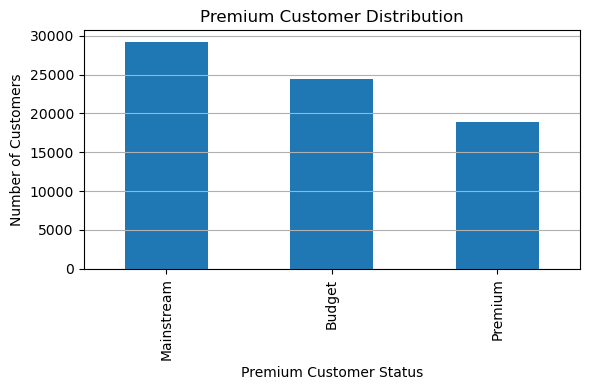

In [47]:
import matplotlib.pyplot as plt

# Lifestage distribution bar chart
customer['LIFESTAGE'].value_counts().plot(kind='bar', figsize=(10, 4), title='Distribution of Lifestages')
plt.ylabel("Number of Customers")
plt.xlabel("Lifestage")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Premium customer distribution
customer['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar', figsize=(6, 4), title='Premium Customer Distribution')
plt.ylabel("Number of Customers")
plt.xlabel("Premium Customer Status")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Merge both datasets

In [48]:
# Perform a left join 
merged_data = pd.merge(transactions_cleaned, customer, on='LYLTY_CARD_NBR', how='left')

# Confirm row count is the same as the transactions dataset
print(f"Original transactions: {len(transactions_cleaned)}")
print(f"Merged dataset rows: {len(merged_data)}")

Original transactions: 246740
Merged dataset rows: 246740


In [50]:
# Check for nulls in LIFESTAGE and PREMIUM_CUSTOMER columns after merge
null_lifestage_count = merged_data['LIFESTAGE'].isnull().sum()
null_premium_count = merged_data['PREMIUM_CUSTOMER'].isnull().sum()

print(f"Transactions with no matching LIFESTAGE: {null_lifestage_count}")
print(f"Transactions with no matching PREMIUM_CUSTOMER: {null_premium_count}")


Transactions with no matching LIFESTAGE: 0
Transactions with no matching PREMIUM_CUSTOMER: 0


There are no nulls therefore all customers in transaction data has been accounted for in the customer dataset.

### Save merged dataframe as CSV

In [51]:
# Save merged dataframe to a CSV file
merged_data.to_csv('merged_transaction_customer_data.csv', index=False)

## Data Analysis on Customer Segments

In [52]:
# Group and sum total sales
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Sort for readability
sales_by_segment = sales_by_segment.sort_values(by='TOT_SALES', ascending=False)

print("Total sales by customer segment:")
print(sales_by_segment)

Total sales by customer segment:
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6           OLDER FAMILIES           Budget  156863.75
19   YOUNG SINGLES/COUPLES       Mainstream  147582.20
13                RETIREES       Mainstream  145168.95
15          YOUNG FAMILIES           Budget  129717.95
9    OLDER SINGLES/COUPLES           Budget  127833.60
10   OLDER SINGLES/COUPLES       Mainstream  124648.50
11   OLDER SINGLES/COUPLES          Premium  123537.55
12                RETIREES           Budget  105916.30
7           OLDER FAMILIES       Mainstream   96413.55
14                RETIREES          Premium   91296.65
16          YOUNG FAMILIES       Mainstream   86338.25
1   MIDAGE SINGLES/COUPLES       Mainstream   84734.25
17          YOUNG FAMILIES          Premium   78571.70
8           OLDER FAMILIES          Premium   75242.60
18   YOUNG SINGLES/COUPLES           Budget   57122.10
2   MIDAGE SINGLES/COUPLES          Premium   54443.85
20   YOUNG SINGLES/COUPLES      

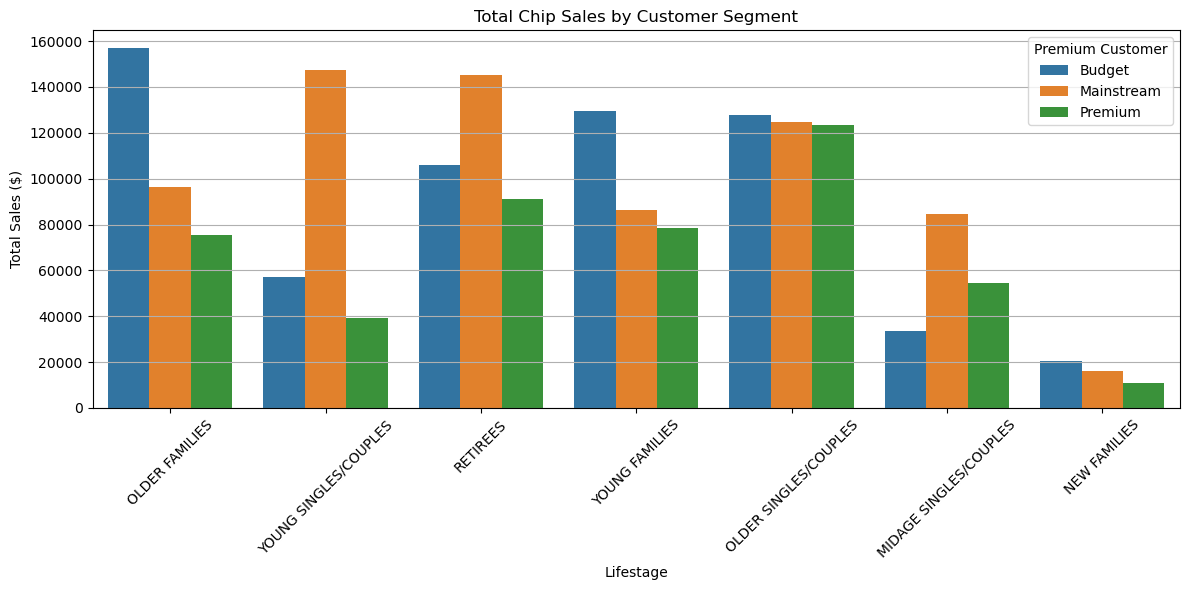

In [54]:
import seaborn as sns

# Set plot style
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')

plt.title('Total Chip Sales by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

We can see that the sales are mainly coming from: Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees.

Let's investigate to see if higher sales are due to more customers who buy chips.

In [57]:
# Count unique loyalty card numbers (i.e., customers) in each segment
customer_count_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Rename column for clarity
customer_count_by_segment.rename(columns={'LYLTY_CARD_NBR': 'NUM_CUSTOMERS'}, inplace=True)

# Sort for nice display
customer_count_by_segment = customer_count_by_segment.sort_values(by='NUM_CUSTOMERS', ascending=False)

print("Number of customers by LIFESTAGE and PREMIUM_CUSTOMER:")
print(customer_count_by_segment)

Number of customers by LIFESTAGE and PREMIUM_CUSTOMER:
                 LIFESTAGE PREMIUM_CUSTOMER  NUM_CUSTOMERS
19   YOUNG SINGLES/COUPLES       Mainstream           7917
13                RETIREES       Mainstream           6358
10   OLDER SINGLES/COUPLES       Mainstream           4858
9    OLDER SINGLES/COUPLES           Budget           4849
11   OLDER SINGLES/COUPLES          Premium           4682
6           OLDER FAMILIES           Budget           4611
12                RETIREES           Budget           4385
15          YOUNG FAMILIES           Budget           3953
14                RETIREES          Premium           3812
18   YOUNG SINGLES/COUPLES           Budget           3647
1   MIDAGE SINGLES/COUPLES       Mainstream           3298
7           OLDER FAMILIES       Mainstream           2788
16          YOUNG FAMILIES       Mainstream           2685
20   YOUNG SINGLES/COUPLES          Premium           2480
17          YOUNG FAMILIES          Premium           2398
2

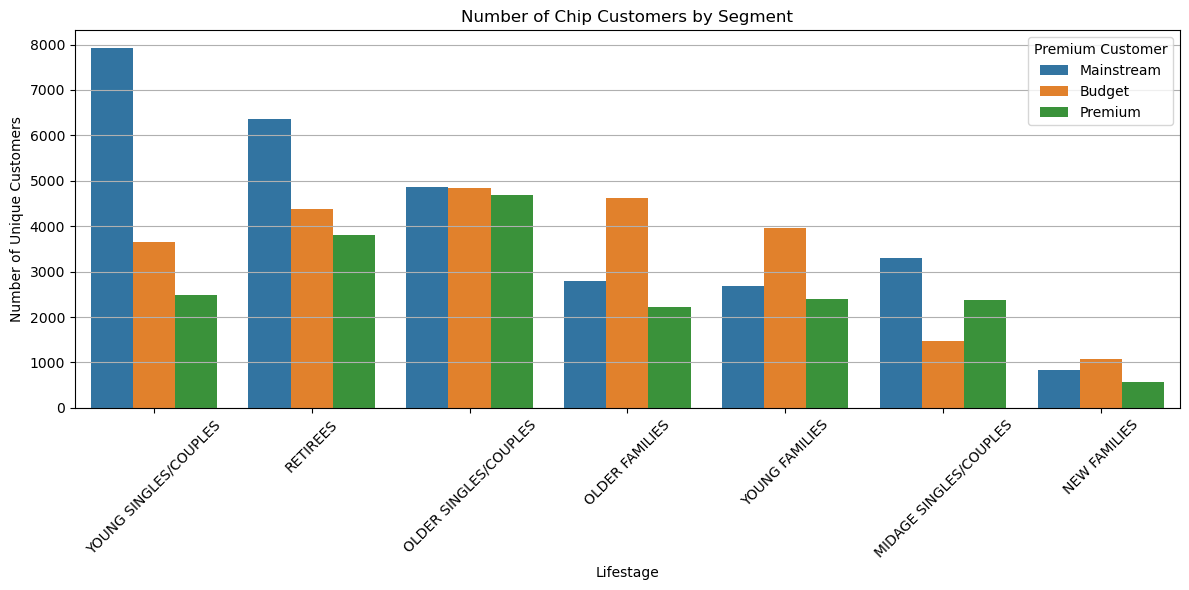

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_count_by_segment, x='LIFESTAGE', y='NUM_CUSTOMERS', hue='PREMIUM_CUSTOMER')

plt.title('Number of Chip Customers by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

There are definitely more Mainstream - Young Singles/Couples and Mainstream - Retirees who buys chips, contributing to more sales to these customer segments.

Whoever this is not the major driver for Budget - Older Families 

It is possible that higher sales are driven by more units of chips being bought per customer.

In [61]:
# Total units per segment
total_units = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index(name='TOTAL_UNITS')

# Number of unique customers per segment (from previous step)
unique_customers = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index(name='NUM_CUSTOMERS')

# Merge to calculate average units per customer
avg_units_per_customer = pd.merge(total_units, unique_customers, on=['LIFESTAGE', 'PREMIUM_CUSTOMER'])
avg_units_per_customer['AVG_UNITS_PER_CUSTOMER'] = avg_units_per_customer['TOTAL_UNITS'] / avg_units_per_customer['NUM_CUSTOMERS']

# Sort for better visual
avg_units_per_customer = avg_units_per_customer.sort_values(by='AVG_UNITS_PER_CUSTOMER', ascending=False)

print("Average units per customer by segment:")
print(avg_units_per_customer[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_UNITS_PER_CUSTOMER']])


Average units per customer by segment:
                 LIFESTAGE PREMIUM_CUSTOMER  AVG_UNITS_PER_CUSTOMER
7           OLDER FAMILIES       Mainstream                9.255380
6           OLDER FAMILIES           Budget                9.076773
8           OLDER FAMILIES          Premium                9.071717
15          YOUNG FAMILIES           Budget                8.722995
17          YOUNG FAMILIES          Premium                8.716013
16          YOUNG FAMILIES       Mainstream                8.638361
9    OLDER SINGLES/COUPLES           Budget                6.781398
11   OLDER SINGLES/COUPLES          Premium                6.769543
10   OLDER SINGLES/COUPLES       Mainstream                6.712021
1   MIDAGE SINGLES/COUPLES       Mainstream                6.432080
12                RETIREES           Budget                6.141847
14                RETIREES          Premium                6.103358
2   MIDAGE SINGLES/COUPLES          Premium                6.078514
0   MIDAG

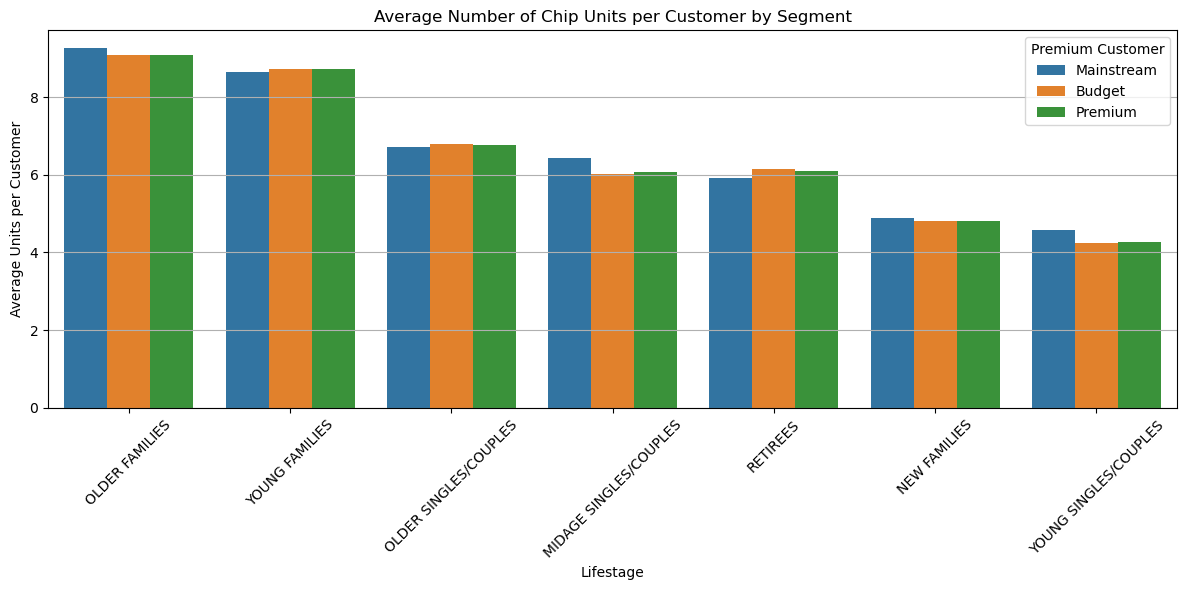

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_units_per_customer, x='LIFESTAGE', y='AVG_UNITS_PER_CUSTOMER', hue='PREMIUM_CUSTOMER')

plt.title('Average Number of Chip Units per Customer by Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Units per Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [65]:
# Total sales and total quantity per segment
sales_qty = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': 'sum',
    'PROD_QTY': 'sum'
}).reset_index()

# Calculate average price per unit
sales_qty['AVG_PRICE_PER_UNIT'] = sales_qty['TOT_SALES'] / sales_qty['PROD_QTY']

# Sort for display
sales_qty = sales_qty.sort_values(by='AVG_PRICE_PER_UNIT', ascending=False)

print("Average price per chip unit by segment:")
print(sales_qty[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_PRICE_PER_UNIT']])

Average price per chip unit by segment:
                 LIFESTAGE PREMIUM_CUSTOMER  AVG_PRICE_PER_UNIT
19   YOUNG SINGLES/COUPLES       Mainstream            4.074043
1   MIDAGE SINGLES/COUPLES       Mainstream            3.994449
4             NEW FAMILIES       Mainstream            3.935887
12                RETIREES           Budget            3.932731
3             NEW FAMILIES           Budget            3.931969
14                RETIREES          Premium            3.924037
11   OLDER SINGLES/COUPLES          Premium            3.897698
9    OLDER SINGLES/COUPLES           Budget            3.887529
5             NEW FAMILIES          Premium            3.886168
13                RETIREES       Mainstream            3.852986
10   OLDER SINGLES/COUPLES       Mainstream            3.822753
2   MIDAGE SINGLES/COUPLES          Premium            3.780823
15          YOUNG FAMILIES           Budget            3.761903
17          YOUNG FAMILIES          Premium            3.759232


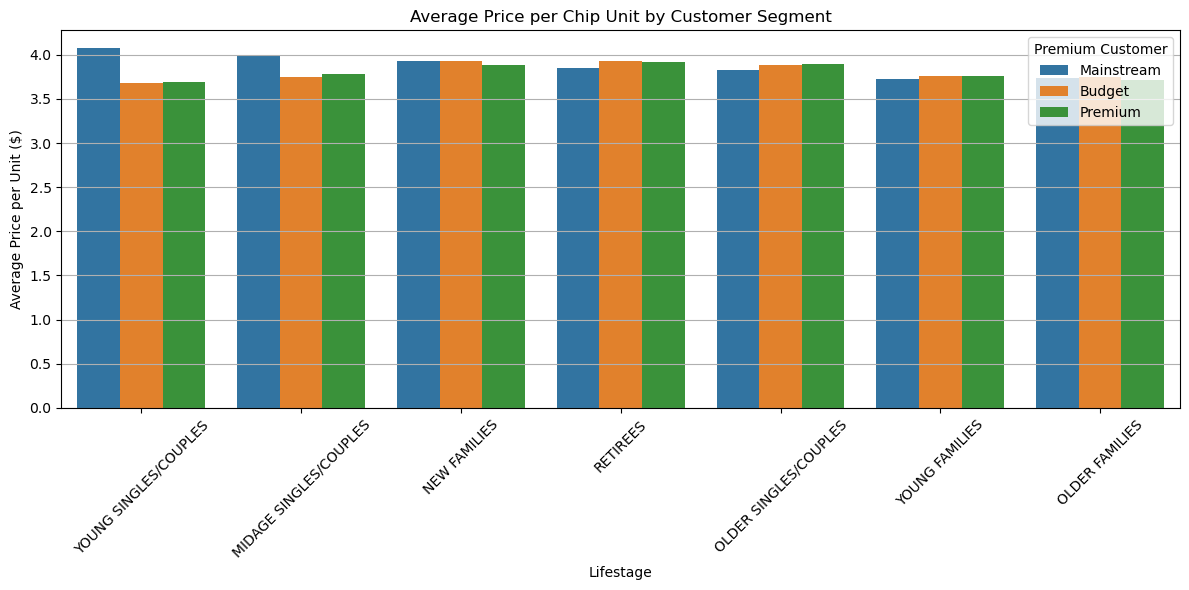

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_qty, x='LIFESTAGE', y='AVG_PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER')

plt.title('Average Price per Chip Unit by Customer Segment')
plt.xlabel('Lifestage')
plt.ylabel('Average Price per Unit ($)')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

It seems like Mainstream Young Singles/Couples and Midage Singles/Couples are willing to pay more per packet of chips compared to their Budget and Premium counterparts.

This may be due to Premium shopers buying more healthy snacks. This is supported by fewer Premium Midage and Young Singles/Couples compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.


In [68]:
from scipy.stats import ttest_ind

# Step 1: Create per-transaction unit price
merged_data['UNIT_PRICE'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']

# Step 2: Filter to only relevant lifestages
filtered = merged_data[merged_data['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES'])]

# Step 3: Split into groups for t-test
mainstream_prices = filtered[filtered['PREMIUM_CUSTOMER'] == 'Mainstream']['UNIT_PRICE']
budget_premium_prices = filtered[filtered['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])]['UNIT_PRICE']

In [69]:
# Perform t-test (equal_var=False allows for unequal variance)
t_stat, p_val = ttest_ind(mainstream_prices, budget_premium_prices, equal_var=False)

print("Independent t-test: Mainstream vs Budget+Premium")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpretation
if p_val < 0.05:
    print("Statistically significant difference in unit price!")
else:
    print("No statistically significant difference in unit price.")


Independent t-test: Mainstream vs Budget+Premium
T-statistic: 37.6244
P-value: 0.0000
Statistically significant difference in unit price!


### Deep dive into Mainstream - Young Singles/Couples (Affinity Analysis)

In [73]:
# Filter for Mainstream Young Singles/Couples
target_segment = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & 
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]

# Step 2a: Proportion of customers in the segment who bought each brand
segment_brand = target_segment.groupby('BRAND')['LYLTY_CARD_NBR'].nunique() / target_segment['LYLTY_CARD_NBR'].nunique()
segment_brand.name = 'SEGMENT_RATIO'

# Step 2b: Proportion of all customers who bought each brand
all_brand = merged_data.groupby('BRAND')['LYLTY_CARD_NBR'].nunique() / merged_data['LYLTY_CARD_NBR'].nunique()
all_brand.name = 'TOTAL_RATIO'

# Combine ratios and calculate affinity
affinity = pd.concat([segment_brand, all_brand], axis=1)
affinity['AFFINITY_RATIO'] = affinity['SEGMENT_RATIO'] / affinity['TOTAL_RATIO']

# Drop NaNs and sort
affinity = affinity.dropna().sort_values(by='AFFINITY_RATIO', ascending=False)

print("Brand affinity for Mainstream - Young Singles/Couples:")
print(affinity.head(10))


Brand affinity for Mainstream - Young Singles/Couples:
           SEGMENT_RATIO  TOTAL_RATIO  AFFINITY_RATIO
BRAND                                                
Kettle          0.387142     0.423303        0.914573
Doritos         0.260326     0.290446        0.896298
Tyrrells        0.076165     0.085696        0.888785
Pringles        0.256158     0.289772        0.883996
Twisties        0.107364     0.122449        0.876807
Tostitos        0.105848     0.122884        0.861370
Cobs            0.103827     0.125745        0.825695
Infuzions       0.143110     0.177311        0.807110
GrnWves         0.078818     0.101589        0.775846
Thins           0.136036     0.176624        0.770203


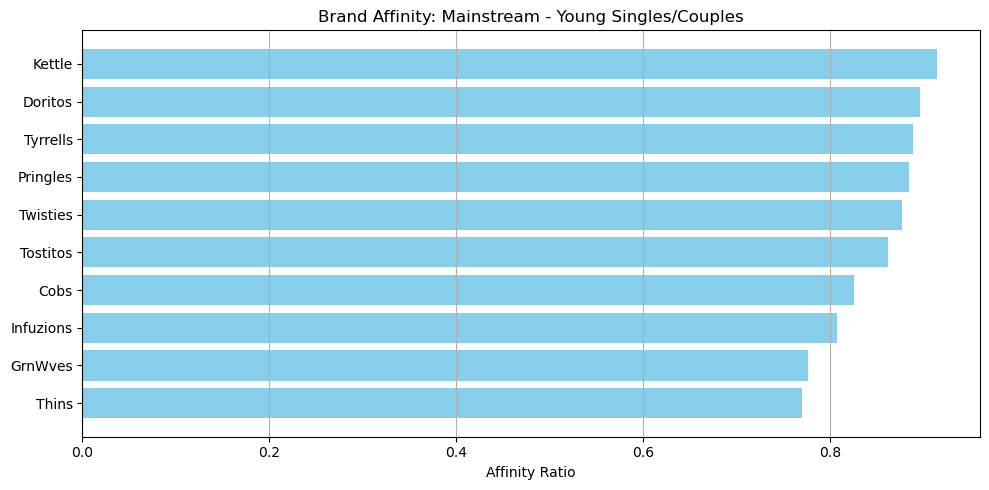

In [72]:
# Plot top 10 brands by affinity
top_affinity = affinity.head(10).sort_values(by='AFFINITY_RATIO')

plt.figure(figsize=(10, 5))
plt.barh(top_affinity.index, top_affinity['AFFINITY_RATIO'], color='skyblue')
plt.title('Brand Affinity: Mainstream - Young Singles/Couples')
plt.xlabel('Affinity Ratio')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

All affinity ratios are < 1 suggesting that this segment buys all of these brands less frequently than the average customer base.

Suggesting that `Mainstream - Young Singles/Couples` do not show a strong brand preference for any of the top brands compared to the general population.

Possible conclusions:
Broad brand exposure - They may be less brand-loyal, exploring a wider variety or choosing based on price/promotions rather than brand.

Opportunities for marketing - Brands targeting this segment could:
-Run promotions or campaigns to increase engagement.
-Highlight value, convenience, or trendiness — qualities that often appeal to young singles/couples.

Target other high-affinity segments - This segment may not be ideal for brand-specific campaigns, but more suitable for lifestyle- or value-based targeting.

In [74]:
# Step 1: Filter for target segment
target_segment = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]

# Step 2: Proportion of target segment customers buying each PACK_SIZE
segment_pack = target_segment.groupby('PACK_SIZE')['LYLTY_CARD_NBR'].nunique() / target_segment['LYLTY_CARD_NBR'].nunique()
segment_pack.name = 'SEGMENT_RATIO'

# Step 3: Proportion of all customers buying each PACK_SIZE
all_pack = merged_data.groupby('PACK_SIZE')['LYLTY_CARD_NBR'].nunique() / merged_data['LYLTY_CARD_NBR'].nunique()
all_pack.name = 'TOTAL_RATIO'

In [75]:
# Combine and compute affinity ratio
pack_affinity = pd.concat([segment_pack, all_pack], axis=1)
pack_affinity['AFFINITY_RATIO'] = pack_affinity['SEGMENT_RATIO'] / pack_affinity['TOTAL_RATIO']

# Clean and sort
pack_affinity = pack_affinity.dropna().sort_values(by='AFFINITY_RATIO', ascending=False)

print("Pack size affinity: Mainstream - Young Singles/Couples")
print(pack_affinity)

Pack size affinity: Mainstream - Young Singles/Couples
           SEGMENT_RATIO  TOTAL_RATIO  AFFINITY_RATIO
PACK_SIZE                                            
270.0           0.074902     0.083101        0.901341
380.0           0.076418     0.085499        0.893781
134.0           0.256158     0.289772        0.883996
330.0           0.139320     0.158262        0.880317
110.0           0.224454     0.262011        0.856657
210.0           0.070102     0.083059        0.844010
250.0           0.035367     0.043374        0.815395
135.0           0.036251     0.044594        0.812907
175.0           0.458254     0.571437        0.801934
150.0           0.313755     0.411842        0.761833
170.0           0.176835     0.237294        0.745212
165.0           0.127700     0.185574        0.688135
190.0           0.018189     0.040316        0.451155
180.0           0.008842     0.020200        0.437709
90.0            0.015789     0.040330        0.391491
160.0           0.015410   

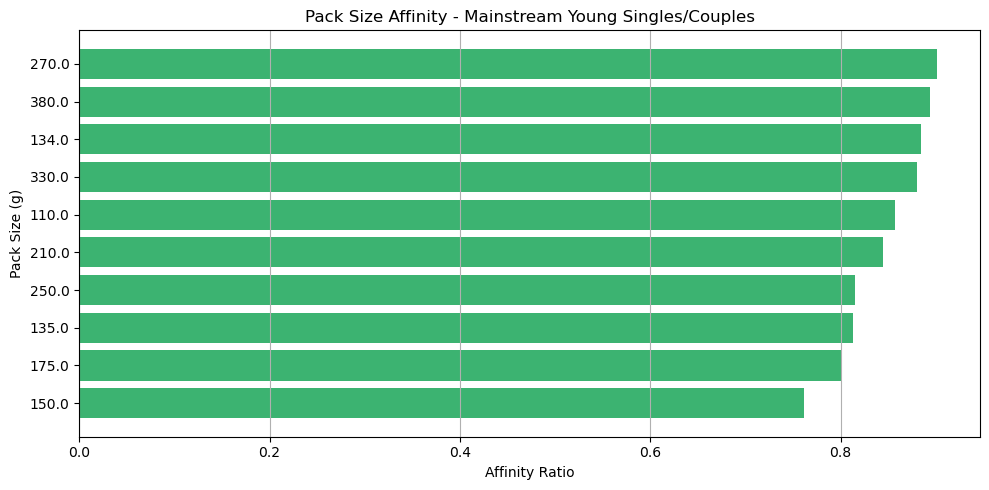

In [76]:
# Plot top 10 pack sizes by affinity
top_pack_affinity = pack_affinity.head(10).sort_values(by='AFFINITY_RATIO')

plt.figure(figsize=(10, 5))
plt.barh(top_pack_affinity.index.astype(str), top_pack_affinity['AFFINITY_RATIO'], color='mediumseagreen')
plt.title('Pack Size Affinity - Mainstream Young Singles/Couples')
plt.xlabel('Affinity Ratio')
plt.ylabel('Pack Size (g)')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

Every Affinity Ratio < 1, suggesting `Mainstream – Young Singles/Couples` buy all pack sizes less frequently than other customer segments.

**Insights:**

* Most popular pack sizes 175g, 150g, 134g, 110g — all have reasonably high uptake but also lower than average.

- **90g, 70g, 110g** all have **low affinity ratios (≤ 0.85)** - Suggests this segment isn't favoring **snack-size packs** more than other groups.

- Larger / Party-Size Packs (270g, 330g, 380g) - Also **less popular** than the general population → All affinity ratios are around **0.88–0.90**

**Recommendations:**

- **Target with promotions, not pack size:**  Since no pack size over-indexes, use value messaging or social tie-ins (e.g., “great for movie night”) instead of focusing on size.

- **Test messaging around convenience or sharing:** Moderate sizes like 175g or 150g still dominate — these could be positioned as convenient or social formats.

- **Contrast with other segments:** Consider comparing with Budget – Older Families, who may over-index on larger pack sizes — useful for segmentation strategy.